In [2]:
!pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [4]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [5]:
features, true_labels = make_blobs(n_samples= 200, centers = 3, cluster_std = 2.75, random_state = 42)

In [10]:
features

array([[ 9.77075874e+00,  3.27621022e+00],
       [-9.71349666e+00,  1.12745180e+01],
       [-6.91330582e+00, -9.34755911e+00],
       [-1.08618591e+01, -1.07506350e+01],
       [-8.50038027e+00, -4.54370383e+00],
       [-4.82456978e+00, -5.20159136e+00],
       [-3.03819028e+00,  9.84354132e+00],
       [-8.17498253e+00, -6.24197227e+00],
       [ 3.91207254e+00,  9.45363489e+00],
       [-4.64425636e+00, -5.14863028e+00],
       [ 2.09082004e+00,  1.80947495e+00],
       [ 5.26539366e+00,  5.56781226e+00],
       [ 7.61826975e+00,  4.87112533e+00],
       [ 3.30512908e+00,  2.19832357e+00],
       [-9.29263277e-01,  2.48591905e+00],
       [-9.15936347e+00, -8.42060745e+00],
       [-2.70722546e+00,  1.17740016e+01],
       [-9.14073328e+00, -6.20996976e+00],
       [ 6.52709436e+00, -2.46179896e+00],
       [-2.51808095e+00, -1.02841022e+01],
       [ 1.04758084e+01,  4.81244915e+00],
       [ 3.33377923e+00,  1.76514294e-01],
       [-5.99215115e+00, -9.15499469e+00],
       [-2.

In [11]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
pd.DataFrame

(array([ 5., 14., 33., 39., 31., 16., 22., 24., 10.,  6.]),
 array([-2.09146419, -1.64606151, -1.20065884, -0.75525616, -0.30985349,
         0.13554919,  0.58095186,  1.02635454,  1.47175721,  1.91715989,
         2.36256256]),
 <BarContainer object of 10 artists>)

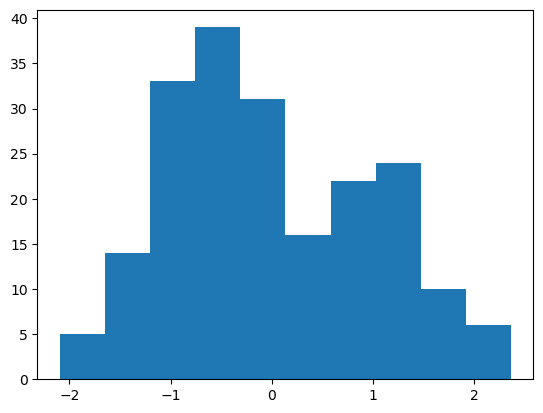

In [16]:
import pandas as pd
plt.hist(pd.DataFrame(scaled_features)[0])

(array([ 5., 32., 22., 16., 15., 38., 20., 32., 14.,  6.]),
 array([-1.984477  , -1.57985061, -1.17522422, -0.77059783, -0.36597144,
         0.03865495,  0.44328134,  0.84790773,  1.25253413,  1.65716052,
         2.06178691]),
 <BarContainer object of 10 artists>)

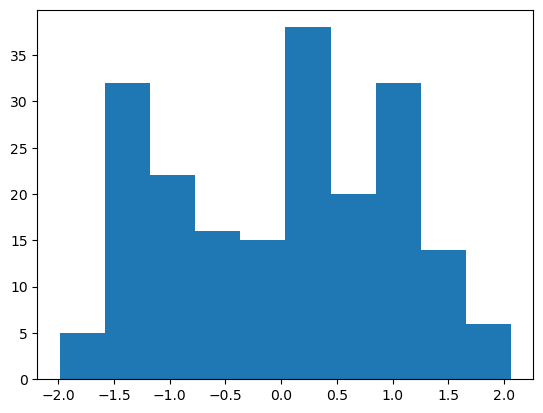

In [19]:
plt.hist(pd.DataFrame(scaled_features)[1],bins=10)

In [21]:
kmeans = KMeans(init = "random", 
                n_clusters = 3,
                n_init = 10, #how many times to run this experiment, then return experiment that gives lowest SSE.
                max_iter = 300,# number of max iterations for each initialization
                random_state = 42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [22]:
kmeans.inertia_ #lowest sse value

74.57960106819854

In [23]:
kmeans.cluster_centers_ #final locations of the centroids

array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [24]:
kmeans.n_iter_ #number of iterations required to converge

10

In [26]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

## Choose appropiate k
- Silhouette 
- Elbow Method

In [27]:
kmeans_args = {"init" : "random",
               "n_init" : 10,
               "max_iter" : 300,
               "random_state" : 42
              }

sse = list()
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, **kmeans_args)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

Text(0.5, 0, 'Number of Clusters')

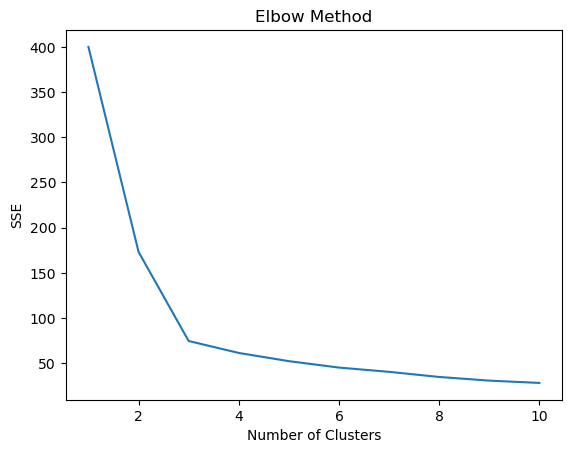

In [29]:
plt.plot(range(1,11), sse)
plt.title('Elbow Method')
plt.ylabel("SSE")
plt.xlabel("Number of Clusters")

Elbow method shows appropiate number of clusters to be k = 3.

In [31]:
kl = KneeLocator(range(1,11), sse, curve = 'convex', direction = 'decreasing')
kl.elbow

3

In [33]:
silhouette_coefficients = list()

for k in range(2,11):
    kmeans = KMeans(n_clusters = k, **kmeans_args)
    kmeans.fit(scaled_features)
    silhouette_coefficients.append(silhouette_score(scaled_features, kmeans.labels_))

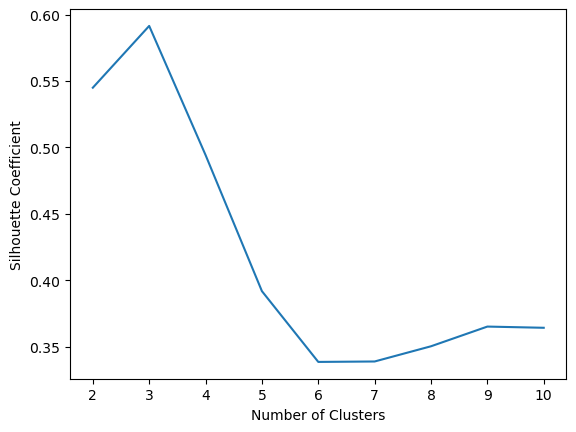

In [35]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Other Clustering Techniques

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

#make_moons creates synthetic data in the shape of crescents

features, true_labels = make_moons(n_samples = 250, noise = 0.05, random_state = 42)
scaled_features = scaler.fit_transform(features)

In [37]:
kmeans = KMeans(n_clusters = 2)
dbscan = DBSCAN(eps = 0.3)

kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

kmeans_silhouette = silhouette_score(scaled_features, kmeans.labels_).round(2)
dbscan_silhouette = silhouette_score(scaled_features, dbscan.labels_).round(2)

/Users/dlebron/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Silhouette is misleading in this scenario

In [38]:
kmeans_silhouette

0.5

In [39]:
dbscan_silhouette

0.38

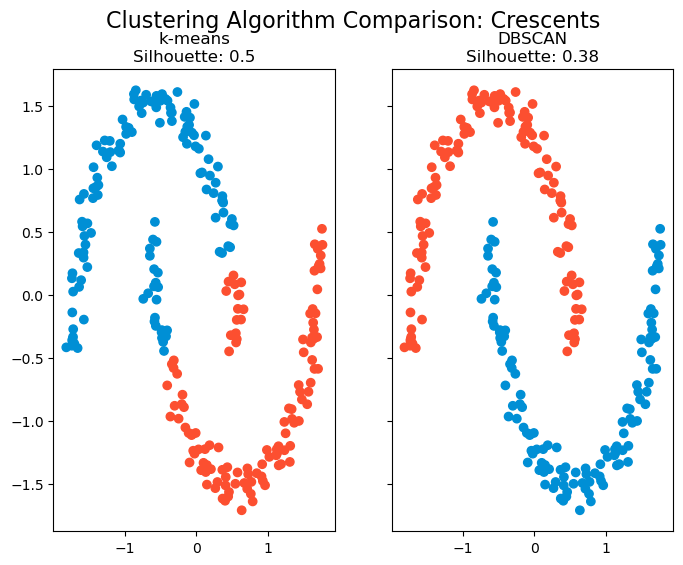

In [40]:
In [24]: # Plot the data and cluster silhouette comparison
   ...: fig, (ax1, ax2) = plt.subplots(
   ...:     1, 2, figsize=(8, 6), sharex=True, sharey=True
   ...: )
   ...: fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
   ...: fte_colors = {
   ...:     0: "#008fd5",
   ...:     1: "#fc4f30",
   ...: }
   ...: # The k-means plot
   ...: km_colors = [fte_colors[label] for label in kmeans.labels_]
   ...: ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
   ...: ax1.set_title(
   ...:     f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
   ...: )
   ...:
   ...: # The dbscan plot
   ...: db_colors = [fte_colors[label] for label in dbscan.labels_]
   ...: ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
   ...: ax2.set_title(
   ...:     f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
   ...: )
   ...: plt.show()

Since labels are actually known we can use a clustering metric that considers the labels in its evaluation.